## Importing Libraries

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [210]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [211]:
!pip install svgling


In [212]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')  # For tokenization
nltk.download('maxent_ne_chunker')
nltk.download('words')  # For word validation in NER

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [213]:
from wordcloud import WordCloud

nltk.download(['stopwords' ,
'punkt' ,
'wordnet' ,
'omw-1.4',
'vader_lexicon'
              ])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 1: Read the Datafram


In [214]:
reviews_dataset = pd.read_csv('Reviews.csv')
reviews_dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [215]:
#Explore the text field
#we can see that they are text noise that must be cleaned
reviews_dataset["Text"].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [216]:
#In this practise we will work a partition of from the main dataset, the main purpose is to illustrate the main steps of NLP model
reviews_analysis_ds=reviews_dataset.head(4000)
reviews_analysis_ds.shape

(4000, 10)

# Step 2: Data Analysis


In [217]:
reviews_analysis_ds['Score'].value_counts()

,count
Score,
5,2541
4,535
1,373
3,317
2,234


<Axes: title={'center': 'Review Count by Score'}, xlabel='Score'>

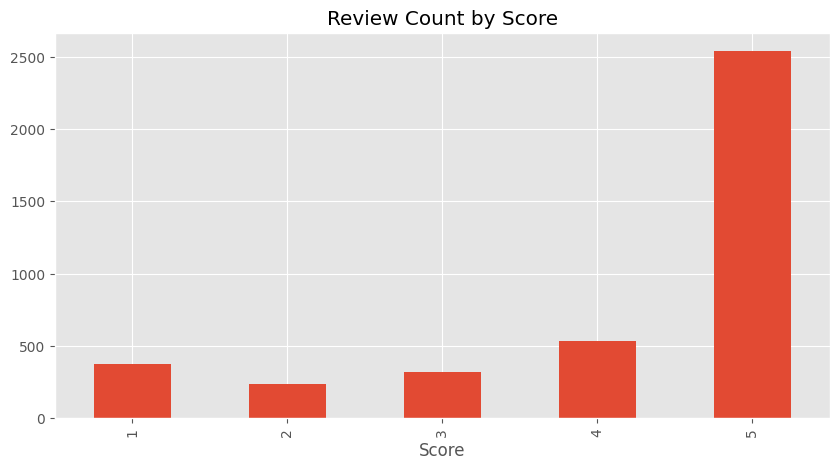

In [218]:
reviews_analysis_ds['Score'].value_counts().sort_index().plot(kind='bar',title="Review Count by Score",figsize=(10,5))

In [219]:
#Most of the review are 5 stars (very baised towards positive reviews)

## NLTK

In [220]:
#create a function that receives text agument tha apply text mining on it

stop_words = nltk.corpus.stopwords.words('english')

def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) # Tokenize
 # Clean tokens: lowercase, remove stopwords, and filter short words
    cleaned_tokens = [word for word in tokenized_document if word.lower() not in stop_words and len(word) > 3]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] # Stemming
    return stemmed_text

In [221]:
reviews_analysis_ds['Text'][50]

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [222]:
#Extract tokens
tokens=nltk.word_tokenize(reviews_analysis_ds['Text'][50])
tokens[:15] #to display a subset of the tokes (15 items only)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like']

In [223]:
#Find part of speech for each word
nltk.pos_tag(tokens)

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [224]:
pos_tags=nltk.pos_tag(tokens)

In [225]:
#Group the pos into chunks
entities=nltk.chunk.ne_chunk(pos_tags)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## VADER Sentiment Analysis

it takes all words, to  specify weather each word is positive , negative or nature



In [226]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sent_Analyzer=SentimentIntensityAnalyzer()

In [227]:
#Run polarity score on Text Column

In [228]:
# We can extract the values from the dictionary and create new columns within our dataframe
reviews_analysis_ds[ 'compound'] = [sent_Analyzer.polarity_scores(review)['compound'] for review in reviews_analysis_ds['Text']]
reviews_analysis_ds[ 'neg'] = [sent_Analyzer.polarity_scores(review)['neg'] for review in reviews_analysis_ds[ 'Text']]
reviews_analysis_ds[ 'neu'] = [sent_Analyzer.polarity_scores(review)['neu'] for review in reviews_analysis_ds['Text']]
reviews_analysis_ds[ 'pos'] = [sent_Analyzer.polarity_scores(review)['pos'] for review in reviews_analysis_ds['Text']]

<ipython-input-228-356b19cbef4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_analysis_ds[ 'compound'] = [sent_Analyzer.polarity_scores(review)['compound'] for review in reviews_analysis_ds['Text']]
<ipython-input-228-356b19cbef4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_analysis_ds[ 'neg'] = [sent_Analyzer.polarity_scores(review)['neg'] for review in reviews_analysis_ds[ 'Text']]
<ipython-input-228-356b19cbef4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [229]:
reviews_analysis_ds.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,0.9441,0.000,0.695,0.305
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",-0.5664,0.138,0.862,0.000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",0.8265,0.091,0.754,0.155
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,0.0000,0.000,1.000,0.000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",0.9468,0.000,0.552,0.448


In [230]:
#Dataframe now has sentiment score merged with the original data

In [231]:
#Check the distrubution of Vedor results with the original data analysis


<Axes: xlabel='Score', ylabel='compound'>

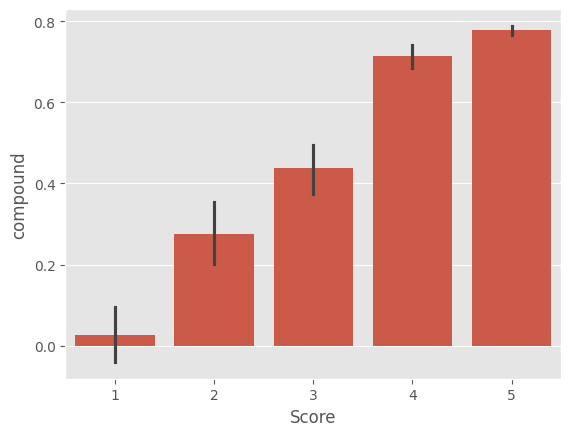

In [232]:
sns.barplot(data=reviews_analysis_ds,x='Score',y='compound')

In [233]:
#The graph show 1 star review has lower compound, while the higher score review has larger compound values.
#Results show that sentient Analyser gives good results.

<Axes: xlabel='Score', ylabel='pos'>

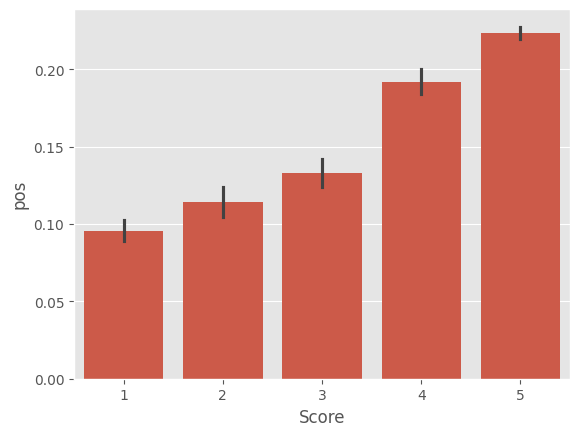

In [234]:
sns.barplot(data=reviews_analysis_ds,x='Score',y='pos')
#higher bar for the highest score

<Axes: xlabel='Score', ylabel='neg'>

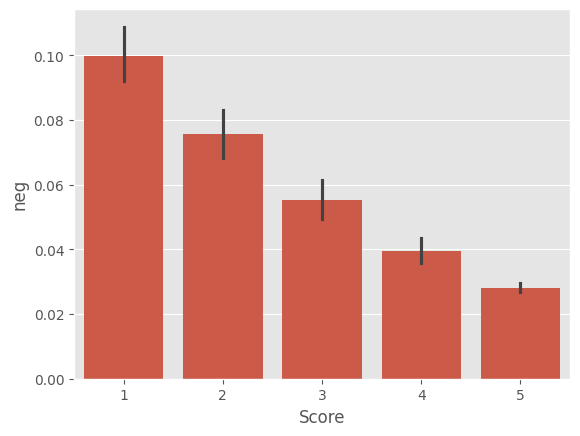

In [235]:
sns.barplot(data=reviews_analysis_ds,x='Score',y='neg')
#Negaviity becomes lower as start reviews become higher

In [236]:
reviews_analysis_ds['processed_review'] = reviews_analysis_ds['Text'].apply(preprocess_text)


<ipython-input-236-d4079b34bf34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_analysis_ds['processed_review'] = reviews_analysis_ds['Text'].apply(preprocess_text)


In [237]:
reviews_analysis_ds['processed_review'].iloc[0]

['bought',
 'sever',
 'vital',
 'can',
 'food',
 'product',
 'found',
 'good',
 'qualiti',
 'product',
 'look',
 'like',
 'stew',
 'process',
 'meat',
 'smell',
 'better',
 'labrador',
 'finicki',
 'appreci',
 'product',
 'better']

In [238]:
reviews_analysis_ds['Text'].iloc[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [239]:
five_star_reviews_subset = reviews_analysis_ds[reviews_analysis_ds['Score']==5]
one_star_reviews_subset = reviews_analysis_ds[reviews_analysis_ds['Score']==1]

In [240]:
five_star_reviews_subset.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos,processed_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,0.9441,0.000,0.695,0.305,"[bought, sever, vital, can, food, product, found, good, qualiti, product, look, like, stew, process, meat, smell, better, labrador, finicki, appreci, product, better]"
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",0.9468,0.000,0.552,0.448,"[great, taffi, great, price, wide, assort, yummi, taffi, deliveri, quick, taffi, lover, deal]"
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!",0.9346,0.034,0.693,0.273,"[saltwat, taffi, great, flavor, soft, chewi, candi, individu, wrap, well, none, candi, stuck, togeth, happen, expens, version, fralinger', would, highli, recommend, candi, serv, beach, theme, parti, everyon, love]"
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!,0.9487,0.000,0.520,0.480,"[taffi, good, soft, chewi, flavor, amaz, would, definit, recommend, buy, satisfi]"
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,0.6369,0.000,0.851,0.149,"[right, mostli, sprout, cat, grass, love, rotat, around, wheatgrass]"


In [241]:
one_star_reviews_subset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos,processed_review
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",-0.5664,0.138,0.862,0.000,"[product, arriv, label, jumbo, salt, peanut, peanut, actual, small, size, unsalt, sure, error, vendor, intend, repres, product, jumbo]"
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat.",0.2960,0.031,0.923,0.046,"[cat, happili, eat, felida, platinum, year, shape, food, differ, tri, food, first, bowl, bowl, full, kitti, touch, food, i'v, notic, similar, review, relat, formula, chang, past, unfortun, need, find, food, cat]"
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan and chewy . I would never buy them again",-0.2960,0.128,0.872,0.000,"[candi, flavor, plan, chewi, would, never]"
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.",-0.5448,0.220,0.780,0.000,"[oatmeal, good, mushi, soft, like, quaker, oat]"
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could not eat any of the 6 bags!!,0.0000,0.000,1.000,0.000,"[arriv, day, stale, could, bag]"


In [242]:
one_star_reviews_subset.shape

(373, 15)

In [243]:
five_star_reviews_subset.shape

(2541, 15)

In [244]:
one_star_tokens = [word for review in one_star_reviews_subset['processed_review'] for word in review]
five_star_tokens = [word for review in five_star_reviews_subset['processed_review'] for word in review]


In [245]:
from collections import Counter

# Count the occurrences of each token
token_counts_one = Counter(one_star_tokens)
token_counts_five = Counter(five_star_tokens)

# Print the total count for each token in descending order
for token, count in token_counts_one.most_common():
    print(f"{token}: {count}")

like: 211
tast: 211
product: 206
food: 130
would: 119
flavor: 113
chip: 112
order: 108
good: 97
even: 96
tri: 92
amazon: 86
review: 73
know: 67
time: 67
realli: 67
use: 65
disappoint: 61
water: 61
make: 60
ingredi: 60
chocol: 59
look: 59
brand: 59
coffe: 57
better: 56
made: 54
bought: 53
sugar: 52
purchas: 52
want: 52
item: 50
packag: 49
differ: 47
also: 47
money: 47
thing: 46
receiv: 46
back: 44
first: 42
well: 42
littl: 41
away: 41
open: 41
need: 40
love: 40
someth: 40
much: 40
think: 40
drink: 40
eat: 39
find: 39
thought: 39
ship: 39
label: 38
year: 38
could: 38
bag: 38
pack: 38
price: 38
best: 37
never: 36
sinc: 36
give: 36
store: 35
i'v: 34
kettl: 34
return: 33
can: 32
actual: 31
chang: 31
ever: 31
real: 31
contain: 31
great: 31
cocoa: 31
found: 30
come: 30
can't: 30
compani: 30
potato: 30
said: 30
free: 29
read: 29
still: 29
cooki: 29
qualiti: 29
cup: 29
corn: 28
diet: 28
sweeten: 27
go: 27
kind: 27
wast: 26
feed: 26
say: 26
case: 25
long: 25
stuff: 25
mayb: 25
recommend: 25
swee

In [246]:
# Print the total count for each token in descending order
for token, count in token_counts_five.most_common():
    print(f"{token}: {count}")

Streaming output truncated to the last 5000 lines.
began: 10
decent: 10
newman': 10
outstand: 10
rave: 10
rais: 10
metal: 10
handi: 10
begin: 10
cut: 10
reaction: 10
earl: 10
chines: 10
oppos: 10
filler: 10
ador: 10
cane: 10
return: 10
cilantro: 10
sesam: 10
malt: 10
england: 10
trust: 10
dairi: 10
oili: 10
vacat: 10
solomon: 10
munch: 10
backyard: 10
suppos: 10
upon: 10
contact: 10
leaf: 10
anytim: 10
prompt: 10
cute: 10
appear: 10
bob': 10
yellow: 10
grown: 10
what': 10
scratch: 10
reward: 10
drank: 10
batter: 10
mixtur: 10
dove: 10
soap: 10
stew: 9
finicki: 9
oldest: 9
unabl: 9
father: 9
known: 9
forev: 9
lime: 9
gummi: 9
directli: 9
solid: 9
room: 9
oil: 9
jack: 9
age: 9
earlier: 9
iam: 9
throughout: 9
folk: 9
routin: 9
escap: 9
messi: 9
expir: 9
shelf: 9
awhil: 9
terribl: 9
portabl: 9
purina: 9
felida: 9
here': 9
youngest: 9
fit: 9
ahmad: 9
complex: 9
steep: 9
savor: 9
basi: 9
worker: 9
steaz: 9
skeptic: 9
everywher: 9
cardboard: 9
gallon: 9
ahead: 9
fan: 9
dust: 9
gravi: 9
fulli:

In [247]:
top_tokens_fiveStars = token_counts_five.most_common(10)
top_tokens_oneStars = token_counts_one.most_common(10)


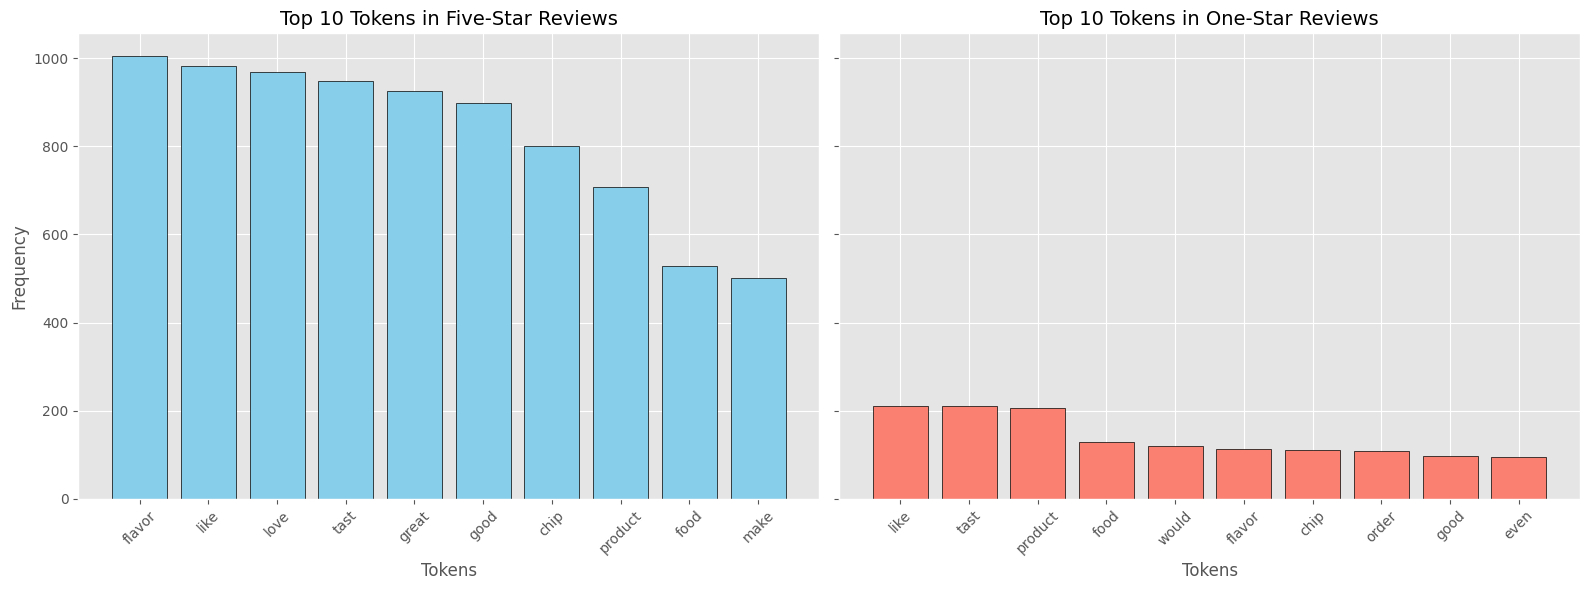

In [248]:
#tract words and counts for five-star reviews
tokens_five, counts_five = zip(*top_tokens_fiveStars)

# Extract words and counts for one-star reviews
tokens_one, counts_one = zip(*top_tokens_oneStars)

# Create subplots for side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Bar chart for five-star reviews
axes[0].bar(tokens_five, counts_five, color='skyblue', edgecolor='black')
axes[0].set_title('Top 10 Tokens in Five-Star Reviews', fontsize=14)
axes[0].set_xlabel('Tokens', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for one-star reviews
axes[1].bar(tokens_one, counts_one, color='salmon', edgecolor='black')
axes[1].set_title('Top 10 Tokens in One-Star Reviews', fontsize=14)
axes[1].set_xlabel('Tokens', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [249]:
#The words "like", "great", "taste", "product", "flavour", "like", "coffee", "dog", "flavor" and "buy" initially appeared in the negative sentiment word cloud,
#despite being positive words. This is probably because they were used in a negative context, such as “ not good .”

In [250]:
import matplotlib.font_manager as fm
print([f.name for f in fm.fontManager.ttflist])


['STIXNonUnicode', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXNonUnicode', 'cmb10', 'DejaVu Sans Display', 'STIXNonUnicode', 'STIXGeneral', 'STIXSizeTwoSym', 'STIXSizeFourSym', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'cmss10', 'STIXGeneral', 'cmmi10', 'STIXSizeThreeSym', 'STIXNonUnicode', 'DejaVu Sans', 'cmtt10', 'cmex10', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'STIXGeneral', 'STIXSizeFourSym', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'cmr10', 'DejaVu Sans', 'STIXSizeOneSym', 'STIXGeneral', 'cmsy10', 'DejaVu Serif', 'STIXSizeFiveSym', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Mono', 'Liberation Mono', 'Liberation Sans', 'Humor Sans', 'Liberation Sans', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Sans', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Serif']


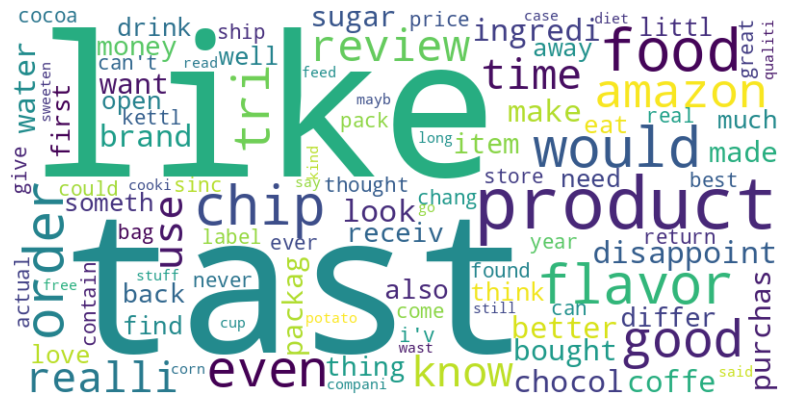

In [251]:
#create a word cloud of the most frequent 100 items from your one_star_tokens
# Step 1: Count frequencies
counter = Counter(one_star_tokens)

# Step 2: Get the top 100 most common words
top_100 = dict(counter.most_common(100))

# Step 3: Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

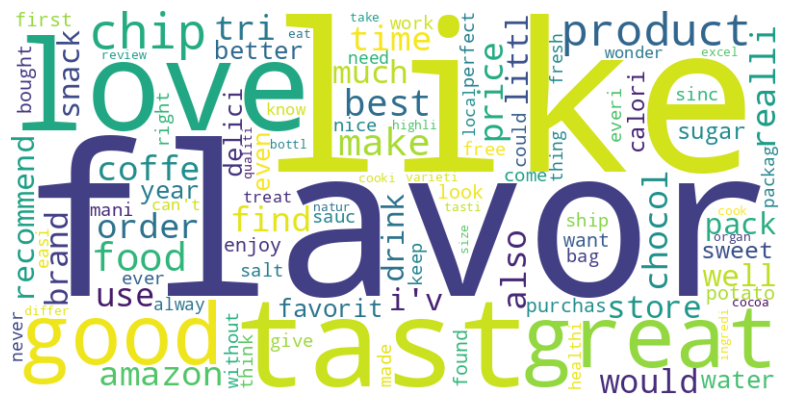

In [252]:
#create a word cloud of the most frequent 100 items from your five_star_tokens

# Step 1: Count frequencies
counter = Counter(five_star_tokens)

# Step 2: Get the top 100 most common words
top_100_five_star = dict(counter.most_common(100))

# Step 3: Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_five_star)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [253]:
#From Wordcloud we can see that there are common words that appeared in both positive and negative reviews,
#we can remove them to create more precise word cloud("good", "like", "tast", "product", "flavor", "like", "would",  and "buy")

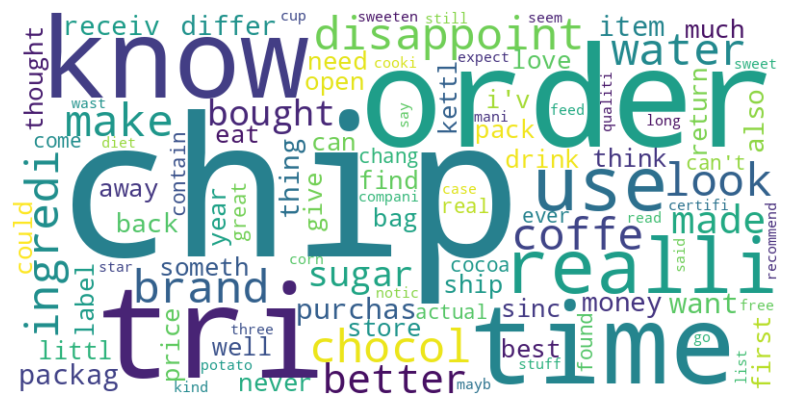

In [254]:

# Step 1: Define a list of words to exclude
excluded_words = { "tast","good",  "product", "flavor","like", "amazon", "dog","buy","review","would","even","food"}

# Step 2: Filter out excluded words in one_star_tokens
OneScore_filtered_tokens = [word for word in one_star_tokens if word not in excluded_words]

# Step 3: Count frequencies
counter = Counter(OneScore_filtered_tokens)

# Step 4: Get the top 100 most common words
top_filtered_one_score = dict(counter.most_common(100))

# Step 5: Generate and display the word cloud
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_filtered_one_score)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()



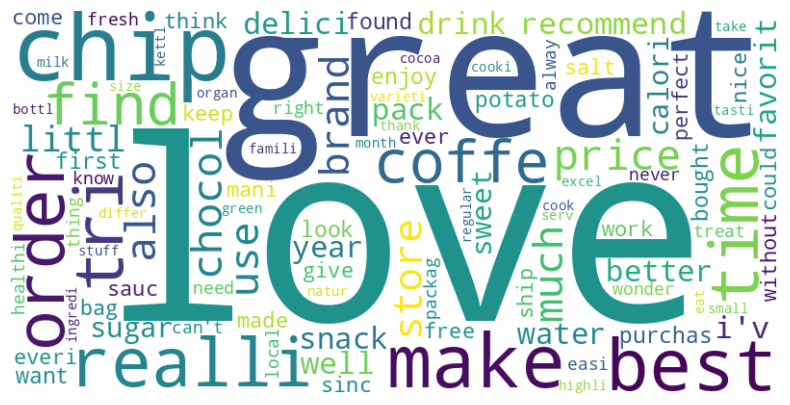

In [255]:

# Filter out excluded words in one_star_tokens
fiveScore_filtered_tokens = [word for word in five_star_tokens if word not in excluded_words]

# Step 3: Count frequencies
counter = Counter(fiveScore_filtered_tokens)

# Step 4: Get the top 100 most common words
top_filtered_five_score = dict(counter.most_common(100))

# Step 5: Generate and display the word cloud
wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_filtered_five_score)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()
#




#Classifying Reviews and Create ML model


In [256]:
# assign reviews with score >= 3 as positive sentiment
# score < 3 negative sentiment
columns=['Score','Summary','Text','processed_review']
Classification_analysis_ds = reviews_analysis_ds[columns]

Classification_analysis_ds .head()


,Score,Summary,Text,processed_review
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,"[bought, sever, vital, can, food, product, found, good, qualiti, product, look, like, stew, process, meat, smell, better, labrador, finicki, appreci, product, better]"
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".","[product, arriv, label, jumbo, salt, peanut, peanut, actual, small, size, unsalt, sure, error, vendor, intend, repres, product, jumbo]"
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.","[confect, around, centuri, light, pillowi, citru, gelatin, nut, case, filbert, tini, squar, liber, coat, powder, sugar, tini, mouth, heaven, chewi, flavor, highli, recommend, yummi, treat, familiar, stori, lewis', lion, witch, wardrob, treat, seduc, edmund, sell, brother, sister, witch]"
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,"[look, secret, ingredi, robitussin, believ, found, addit, root, beer, extract, order, good, made, cherri, soda, flavor, medicin]"
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.","[great, taffi, great, price, wide, assort, yummi, taffi, deliveri, quick, taffi, lover, deal]"


In [257]:
# Assign sentiment based on the score
Classification_analysis_ds['sentiment'] = Classification_analysis_ds['Score'].apply(
    lambda x: 1 if x in [3, 4, 5] else -1)

<ipython-input-257-c3f71c1e791d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Classification_analysis_ds['sentiment'] = Classification_analysis_ds['Score'].apply(


In [258]:
Classification_analysis_ds.head()

,Score,Summary,Text,processed_review,sentiment
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,"[bought, sever, vital, can, food, product, found, good, qualiti, product, look, like, stew, process, meat, smell, better, labrador, finicki, appreci, product, better]",1
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".","[product, arriv, label, jumbo, salt, peanut, peanut, actual, small, size, unsalt, sure, error, vendor, intend, repres, product, jumbo]",-1
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.","[confect, around, centuri, light, pillowi, citru, gelatin, nut, case, filbert, tini, squar, liber, coat, powder, sugar, tini, mouth, heaven, chewi, flavor, highli, recommend, yummi, treat, familiar, stori, lewis', lion, witch, wardrob, treat, seduc, edmund, sell, brother, sister, witch]",1
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,"[look, secret, ingredi, robitussin, believ, found, addit, root, beer, extract, order, good, made, cherri, soda, flavor, medicin]",-1
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.","[great, taffi, great, price, wide, assort, yummi, taffi, deliveri, quick, taffi, lover, deal]",1


In [259]:
# Preprocessing cell preprocess_text function to apply stemming , remove stop words and indentify words



In [260]:
# Adjust pandas option to display full content
pd.set_option('display.max_colwidth', None)

In [261]:
Classification_analysis_ds.head()

,Score,Summary,Text,processed_review,sentiment
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,"[bought, sever, vital, can, food, product, found, good, qualiti, product, look, like, stew, process, meat, smell, better, labrador, finicki, appreci, product, better]",1
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".","[product, arriv, label, jumbo, salt, peanut, peanut, actual, small, size, unsalt, sure, error, vendor, intend, repres, product, jumbo]",-1
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.","[confect, around, centuri, light, pillowi, citru, gelatin, nut, case, filbert, tini, squar, liber, coat, powder, sugar, tini, mouth, heaven, chewi, flavor, highli, recommend, yummi, treat, familiar, stori, lewis', lion, witch, wardrob, treat, seduc, edmund, sell, brother, sister, witch]",1
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,"[look, secret, ingredi, robitussin, believ, found, addit, root, beer, extract, order, good, made, cherri, soda, flavor, medicin]",-1
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.","[great, taffi, great, price, wide, assort, yummi, taffi, deliveri, quick, taffi, lover, deal]",1


In [262]:
# generate the Term Frequency Matrix
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(Classification_analysis_ds['processed_review'].map(' '.join))
x = pd.DataFrame(x.toarray())
x.head()

,0,1,2,3,4,5,6,7,8,9,...,7771,7772,7773,7774,7775,7776,7777,7778,7779,7780
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
print(Classification_analysis_ds.groupby("sentiment").count())

           Score  Summary  Text  processed_review
sentiment                                        
-1           607      607   607               607
 1          3393     3393  3393              3393


In [264]:
# split the data into the training and test datasets
from sklearn.model_selection import train_test_split

y = Classification_analysis_ds['sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    x,y, train_size = 0.8, test_size = 0.2, random_state = 99)

<Axes: xlabel='sentiment', ylabel='count'>

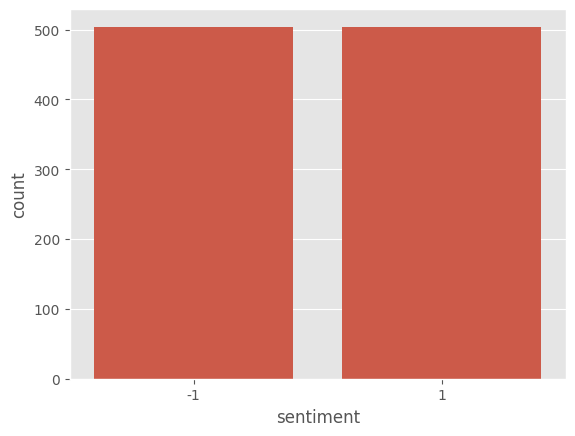

In [265]:
# carry out undersampling to provide a balanced dataset
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state = 0)
x_train_undersampled, y_train_undersampled = resampler.fit_resample(x_train, y_train)

sns.countplot( x =y_train_undersampled)

In [266]:
# MultinomialNB (Multinomial Naïve Bayes) classifier, one of the two classic naïve Bayes variants used for text classification
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_undersampled, y_train_undersampled)
MultinomialNB()

MultinomialNB()

In [267]:
# Evalute the model
y_pred = model.predict(x_test)
# Computing the accuracy and making the confusion matrix
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.75


Confusion Matrix:
[[ 86  17]
 [181 516]] 


--------------------------------------------
Classification Report:

              precision    recall  f1-score   support

          -1       0.32      0.83      0.46       103
           1       0.97      0.74      0.84       697

    accuracy                           0.75       800
   macro avg       0.65      0.79      0.65       800
weighted avg       0.88      0.75      0.79       800



In [268]:
# Train a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_undersampled, y_train_undersampled)

# Make predictions on the test set
y_pred = classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy =metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.78875


In [269]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline


# Step 1: Preprocess the text (tokenize, remove stopwords, lemmatize)
def preprocess_review(text):
    # Tokenizer and lemmatizer setup
    stop_words = set(stopwords.words('english'))
    tokenizer = RegexpTokenizer(r'[a-zA-Z0-9\']+')
    lemmatizer = WordNetLemmatizer()

    # Tokenize and convert to lowercase
    tokens = tokenizer.tokenize(text.lower())

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)


In [270]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [271]:
def lemm_text(text):
    """
    Preprocess the input text by removing stopwords, numbers, words shorter than 3 characters,
    applying stemming, and lemmatizing the words.

    Args:
        text (str): The input text to preprocess.

    Returns:
        list: A list of processed words.
    """
    # Initialize the tools
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Tokenize the input text
    words = word_tokenize(text)

    # Remove stopwords, numbers, short words, apply stemming, and lemmatize
    processed_words = [
        lemmatizer.lemmatize(stemmer.stem(word.lower()))
        for word in words
        if word.isalnum() and word.lower() not in stop_words and len(word) >= 3 and not word.isdigit()
    ]

    return processed_words

In [272]:

# Preprocess  text reviews
Classification_analysis_ds['lemm_text']=Classification_analysis_ds['Text'].apply(lemm_text)




<ipython-input-272-edb1493d205d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Classification_analysis_ds['lemm_text']=Classification_analysis_ds['Text'].apply(lemm_text)


In [273]:
Classification_analysis_ds.tail()

,Score,Summary,Text,processed_review,sentiment,lemm_text
3995,4,one of my favorite cookies,"These cookies are both yummy and well priced. I recommend them. Other cookies I like are Mrs. Fields(packaged), Chips ahoy soft baked, fig newtons, oreos, and elf cookies.","[cooki, yummi, well, price, recommend, cooki, like, field, packag, chip, ahoy, soft, bake, newton, oreo, cooki]",1,"[cooki, yummi, well, price, recommend, cooki, like, field, packag, chip, ahoy, soft, bake, fig, newton, oreo, elf, cooki]"
3996,5,Our favorite grocery store chocolate chip cookie,"This is not a gourmet chocolate chip cookie, but is the best chocolate chip cookie that we have found in the grocery store. It is not too firm or soft, has a good amount of flavorful chocolate chips, and makes for a nice snack or dessert. We have eaten these for years in my house.","[gourmet, chocol, chip, cooki, best, chocol, chip, cooki, found, groceri, store, firm, soft, good, amount, flavor, chocol, chip, make, nice, snack, dessert, eaten, year, hous]",1,"[gourmet, chocol, chip, cooki, best, chocol, chip, cooki, found, groceri, store, firm, soft, good, amount, flavor, chocol, chip, make, nice, snack, dessert, eaten, year, hous]"
3997,4,Arrived Fresh and in Good Shape.,"It's a lot of cookies, but the price is very good compared to the local grocery store. The packages were in good shape and the cookies were fresh. My order from January 25th has an expiration date of April 28th. Not bad, but I would have preferred a later expiration date. Other than that, no problems. Exactly the same Chips Ahoy you would buy in the store.","[cooki, price, good, compar, local, groceri, store, packag, good, shape, cooki, fresh, order, januari, 25th, expir, date, april, 28th, would, prefer, later, expir, date, problem, exactli, chip, ahoy, would, store]",1,"[lot, cooki, price, good, compar, local, groceri, store, packag, good, shape, cooki, fresh, order, januari, 25th, expir, date, april, 28th, bad, would, prefer, later, expir, date, problem, exactli, chip, ahoy, would, buy, store]"
3998,4,"Delicious, though a bit on the small side.","Delicious cookies. I actually thought I was ordering the white chocolate chunk cookies, not the chewy, but definitely enjoyed these. The only down side, is these seem awfully small.","[delici, cooki, actual, thought, order, white, chocol, chunk, cooki, chewi, definit, enjoy, side, seem, aw, small]",1,"[delici, cooki, actual, thought, order, white, chocol, chunk, cooki, chewi, definit, enjoy, side, seem, aw, small]"
3999,5,Great as a baby shower party favor!,Exactly what I wanted...individual packages of cookies that I couldn't find at a store. Shipping was only 99cents and came to be in about 3 days.<br /><br />It was great!,"[exactli, want, individu, packag, cooki, find, store, ship, 99cent, came, day, great]",1,"[exactli, want, individu, packag, cooki, could, find, store, ship, 99cent, came, great]"


In [274]:
# generate the Term Frequency Matrix
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(Classification_analysis_ds['lemm_text'].map(' '.join))
x = pd.DataFrame(x.toarray())
x.head()

,0,1,2,3,4,5,6,7,8,9,...,7656,7657,7658,7659,7660,7661,7662,7663,7664,7665
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
print(Classification_analysis_ds.groupby("sentiment").count())

           Score  Summary  Text  processed_review  lemm_text
sentiment                                                   
-1           607      607   607               607        607
 1          3393     3393  3393              3393       3393


In [276]:
# split the data into the training and test datasets
from sklearn.model_selection import train_test_split

y = Classification_analysis_ds['sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    x,y, train_size = 0.8, test_size = 0.2, random_state = 99)

<Axes: xlabel='sentiment', ylabel='count'>

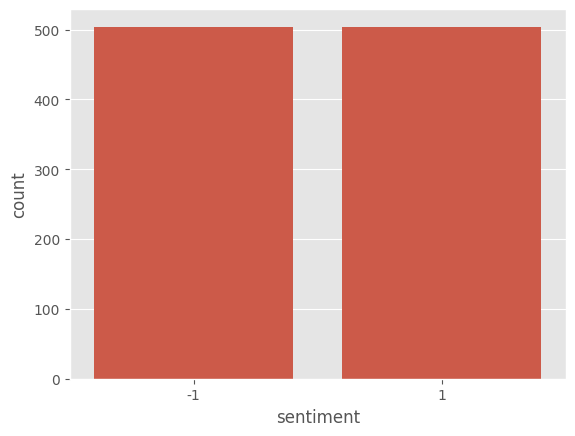

In [277]:
# carry out undersampling to provide a balanced dataset
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state = 0)
x_train_undersampled, y_train_undersampled = resampler.fit_resample(x_train, y_train)

sns.countplot( x =y_train_undersampled)

In [278]:
# Train a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_undersampled, y_train_undersampled)

# Make predictions on the test set
y_pred = classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy =metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7825


# This part of work, analyze negative reviews that are identified by nltk pos package and find common words

In [279]:
# Create a new DataFrame with negative sentiment (sentiment = -1)
negative_sentiment_df = Classification_analysis_ds[Classification_analysis_ds["sentiment"] == -1]
negative_sentiment_df.shape

(607, 6)

In [282]:
# Flatten the list of tokens into a single list
all_negative_words = [word for tokens in negative_sentiment_df['processed_review'] for word in tokens if word not in excluded_words]

# Count word frequencies
word_counter = Counter(all_negative_words)

# Get the  most common words
top_500_common_words = word_counter.most_common(500)

# Convert to a dictionary (optional, for further processing)
top_500_dict = dict(top_500_common_words)

# Display the result
print(top_500_common_words)

[('chip', 174), ('order', 151), ('water', 141), ('tri', 135), ('time', 112), ('realli', 112), ('much', 111), ('make', 108), ('use', 104), ('drink', 102), ('better', 98), ('look', 96), ('chocol', 95), ('brand', 95), ('ingredi', 90), ('sugar', 89), ('disappoint', 89), ('love', 88), ('coffe', 88), ('want', 86), ('made', 85), ('know', 85), ('bought', 85), ('purchas', 83), ('also', 82), ('littl', 80), ('packag', 79), ('first', 78), ('open', 76), ('thing', 71), ('differ', 70), ('price', 69), ('well', 69), ('thought', 67), ('ship', 66), ("i'v", 64), ('bag', 64), ('think', 64), ('item', 64), ('away', 64), ('find', 62), ('need', 61), ('still', 61), ('give', 61), ('great', 61), ('could', 59), ('money', 59), ('contain', 58), ('pack', 58), ('receiv', 57), ('best', 56), ('store', 55), ('back', 55), ('found', 53), ('eat', 53), ('someth', 53), ('kettl', 51), ('never', 50), ('sinc', 50), ('size', 49), ('go', 49), ('take', 48), ('sweet', 47), ('cooki', 47), ('actual', 46), ('year', 46), ('free', 46), (

In [281]:
from nltk import ngrams

# Generate bigrams from tokens
negative_sentiment_df['bigrams'] = negative_sentiment_df['processed_review'].apply(
    lambda tokens: list(ngrams(tokens, 2))
)

# Flatten and count bigrams
all_bigrams = [bigram for bigrams in negative_sentiment_df['bigrams'] for bigram in bigrams]
bigram_counter = Counter(all_bigrams)

# Get the top 100 most common bigrams
top_500_bigrams = bigram_counter.most_common(500)
print(top_500_bigrams)


[(('tast', 'like'), 60), (('wast', 'money'), 22), (('scienc', 'diet'), 20), (('potato', 'chip'), 19), (('groceri', 'store'), 19), (('look', 'like'), 17), (('swiss', 'miss'), 17), (('tast', 'good'), 16), (('much', 'better'), 16), (('bake', 'lay'), 16), (('kettl', 'chip'), 15), (('even', 'though'), 14), (('aliv', 'awar'), 14), (('grove', 'squar'), 14), (('would', 'recommend'), 13), (('gluten', 'free'), 13), (('coconut', 'water'), 13), (('stay', 'away'), 12), (('local', 'groceri'), 12), (('thought', 'would'), 12), (('href', 'http'), 12), (('http', 'amazon'), 12), (('amazon', 'product'), 12), (('first', 'time'), 11), (('sour', 'cream'), 11), (('ingredi', 'list'), 11), (('good', 'tast'), 11), (('corn', 'syrup'), 11), (('dark', 'chocol'), 11), (('stash', 'product'), 11), (("i'v", 'tri'), 10), (('throw', 'away'), 10), (('noth', 'like'), 10), (('save', 'money'), 10), (('realli', 'like'), 10), (('kettl', 'brand'), 10), (('artifici', 'sweeten'), 10), (('sugar', 'free'), 9), (('custom', 'servic')

<ipython-input-281-f2c3f840505b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentiment_df['bigrams'] = negative_sentiment_df['processed_review'].apply(
